# Two Weeks Notice: Employee Exit Surveys from the DETE and TAFE in Queensland, Australia
Two government offices in Queensland, Australia are interested in increasing their employee retention to reduce costs associated with interviewing, hiring, and training new staff. The Department of Education, Training, and Employment (DETE) and the Technical and Further Education (TAFE) Institute have supplied us with employee exit surveys from the last several years. They are interested in identifying factors that contribute to employees leaving their organizations.

We will find through this analysis that employees with more seniority have much higher levels upon resignation than more junior staff. We will also discover a measured difference in dissatisfaction between the organizations, a recommend avenues for exploring the cause behind this.

## Finding, Opening, and Exploring the Data

The DETE exit survey data can be found [here](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey). Unfortunately the original TAFE data is no longer readily available online. Both data files are attached to this project for posterity. We'll open the two files as DataFrames using the Pandas library, then print the headers and info for each. We'll use this to get a feel for the data.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.options.display.min_rows = 80
dete_raw = pd.read_csv('dete_survey.csv', na_values = 'Not Stated')
tafe_raw = pd.read_csv('tafe_survey.csv')
dete_raw.head(25)

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,A,A,N,N,N,A,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,A,N,N,N,N,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,A,A,N,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,N,N,N,A,A,N,N,A,A,A,A,A,A,A,A,A,A,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,A,A,N,N,D,D,N,A,A,A,A,A,A,SA,SA,D,D,A,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN
5,6,Resignation-Other reasons,05/2012,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,SD,SD,SD,D,SD,D,D,A,NaN,SA,A,A,N,N,D,A,D,D,D,D,NaN,Female,41-45,NaN,NaN,NaN,NaN,NaN
6,7,Age Retirement,05/2012,1972.0,2007.0,Teacher,Secondary,Darling Downs South West,NaN,Permanent Part-time,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,SD,N,SD,D,A,A,D,D,SA,D,N,N,D,D,N,N,D,D,D,D,SD,Female,56-60,NaN,NaN,NaN,NaN,NaN
7,8,Age Retirement,05/2012,1988.0,1990.0,Teacher Aide,NaN,North Coast,NaN,Permanent Part-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,NaN,A,A,SA,SA,SA,SA,A,SA,SA,A,NaN,A,N,A,SA,A,SA,NaN,SA,Female,61 or older,NaN,NaN,NaN,NaN,NaN
8,9,Resignation-Other reasons,07/2012,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,D,N,D,D,N,SD,SD,D,D,N,A,NaN,SD,SD,N,D,SD,D,A,D,N,Female,31-35,NaN,NaN,NaN,NaN,NaN
9,10,Resignation-Other employer,2012,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,SD,SD,SD,SD,A,SD,SD,SD,SD,SD,SD,SD,SD,SD,SD,SD,SD,SD,SD,SD,SD,Female,46-50,NaN,NaN,NaN,NaN,NaN


In [3]:
tafe_raw.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Main Factor. Which of these was the main factor for leaving?,InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction,InstituteViews. Topic:2. I was given access to skills training to help me do my job better,InstituteViews. Topic:3. I was given adequate opportunities for personal development,InstituteViews. Topic:4. I was given adequate opportunities for promotion within %Institute]Q25LBL%,InstituteViews. Topic:5. I felt the salary for the job was right for the responsibilities I had,InstituteViews. Topic:6. The organisation recognised when staff did good work,InstituteViews. Topic:7. Management was generally supportive of me,InstituteViews. Topic:8. Management was generally supportive of my team,InstituteViews. Topic:9. I was kept informed of the changes in the organisation which would affect me,InstituteViews. Topic:10. Staff morale was positive within the Institute,InstituteViews. Topic:11. If I had a workplace issue it was dealt with quickly,InstituteViews. Topic:12. If I had a workplace issue it was dealt with efficiently,InstituteViews. Topic:13. If I had a workplace issue it was dealt with discreetly,WorkUnitViews. Topic:14. I was satisfied with the quality of the management and supervision within my work unit,WorkUnitViews. Topic:15. I worked well with my colleagues,WorkUnitViews. Topic:16. My job was challenging and interesting,WorkUnitViews. Topic:17. I was encouraged to use my initiative in the course of my work,WorkUnitViews. Topic:18. I had sufficient contact with other people in my job,WorkUnitViews. Topic:19. I was given adequate support and co-operation by my peers to enable me to do my job,WorkUnitViews. Topic:20. I was able to use the full range of my skills in my job,WorkUnitViews. Topic:21. I was able to use the full range of my abilities in my job. ; Category:Level of Agreement; Question:YOUR VIEWS ABOUT YOUR WORK UNIT],WorkUnitViews. Topic:22. I was able to use the full range of my knowledge in my job,WorkUnitViews. Topic:23. My job provided sufficient variety,WorkUnitViews. Topic:24. I was able to cope with the level of stress and pressure in my job,WorkUnitViews. Topic:25. My job allowed me to balance the demands of work and family to my satisfaction,WorkUnitViews. Topic:26. My supervisor gave me adequate personal recognition and feedback on my performance,"WorkUnitViews. Topic:27. My working environment was satisfactory e.g. sufficient space, good lighting, suitable seating and working area",WorkUnitViews. Topic:28. I was given the opportunity to mentor and coach others in order for me to pass on my skills and knowledge prior to my cessation date,WorkUnitViews. Topic:29. There was adequate communication between staff in my unit,WorkUnitViews. Topic:30. Staff morale was positive within my work unit,Induction. Did you undertake Workplace Induction?,InductionInfo. Topic:Did you undertake a Corporate Induction?,InductionInfo. Topic:Did you undertake a Institute Induction?,InductionInfo. Topic: Did you undertake Team Induction?,InductionInfo. Face to Face Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. On-line Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. Induction Manual Topic:Did you undertake a Corporate Induction?,InductionInfo. Face to Face Topic:Did you undertake a Institute Induction?,InductionInfo. On-line Topic:Did you undertake a Institute Induction?

In [4]:
dete_raw.info()
tafe_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   822 non-null    int64  
 1   SeparationType                       822 non-null    object 
 2   Cease Date                           788 non-null    object 
 3   DETE Start Date                      749 non-null    float64
 4   Role Start Date                      724 non-null    float64
 5   Position                             817 non-null    object 
 6   Classification                       455 non-null    object 
 7   Region                               717 non-null    object 
 8   Business Unit                        126 non-null    object 
 9   Employment Status                    817 non-null    object 
 10  Career move to public sector         822 non-null    bool   
 11  Career move to private sector   

Upon initial observation, dete_raw contains data for age in ranges, employment and role start and end dates, and booleans for various reasons for leaving. It also has 21 questionnaire answers with (Strongly) Agree/Disagree or Neutral as (S)A/D or N. Without the actual questions it may be hard to draw conclusions from that, but we can make some assumption if it seems necessary. It's also possible the questions could be inferred from tafe_raw.

tafe_raw contains data for age in ranges, employment and role duration, and non-boolean responses for certain job dissatisfaction reasons. It also has 48 questionnaire answers in (S) A/D or N format. The column names are the full survey questions, which makes them both informative and unwieldy.

## Preliminary Data Cleaning

To start, the Queensland agencies want us to find the distribution of dissatisfaction based on employee experience level. We want to look at just resignations rather than retirements, terminations, transfers etc. Then we can find how many of those resigning listed a reason that was based on the workplace. To streamline the process, we can look at the column names and see if there are similarities that we can draw between the datasets.

In [5]:
print(dete_raw.columns)
print(tafe_raw.columns)

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Professional Development',
       'Opportunities for promotion', 'Staff morale', 'Workplace issue',
       'Physical environment', 'Worklife balance',
       'Stress and pressure support', 'Performance of supervisor',
       'Peer support', 'Initiative', 'Skills', 'Coach', 'Career Aspirations',
       'Feedback', 'Further PD', 'Communication', 'My say', 'Inform

Many of columns in the DETE data directly correspond to the `Contributing Factors` in the TEFE data. Since we want to combine the data for our analysis, we'll adjust the column names to be more uniform and refer to them as `separation types`. We'll also adjust columns like `Gender. What is your Gender?` to just `gender`, keeping the meaning while simplifying the table.

In [6]:
dete_labels = dete_raw.copy()
tafe_labels = tafe_raw.copy()
dete_labels.columns = dete_raw.columns.str.strip().str.replace(' ', '_'
                                ).str.replace('Type', '_type').str.lower()
tafe_labels.columns = tafe_raw.columns.str.replace('Record ID', 'id', regex = False
                                ).str.replace('Gender. What is your Gender?', 'gender', regex = False
                                ).str.replace('Reason for ceasing employment', 'separation_type', regex = False
                                ).str.replace('CurrentAge. Current Age', 'age', regex = False
                                ).str.replace('CESSATION YEAR', 'cease_date', regex = False
                                ).str.replace('Employment Type. Employment Type', 'employment_status', regex = False
                                ).str.replace('Classification. Classification', 'position', regex = False
                                ).str.replace('LengthofServiceOverall. Overall Length of Service at Institute (in years)', 'institute_service', regex = False
                                ).str.replace('LengthofServiceCurrent. Length of Service at current workplace (in years)', 'role_service', regex = False
                                ).str.replace('Contributing Factors', '', regex = False
                                ).str.replace(' -', '', regex = False).str.replace('-', ' ', regex = False
                                ).str.replace('.', '', regex = False
                                ).str.strip().str.replace(' ', '_', regex = False).str.lower()
print(dete_labels.columns)
print(tafe_labels.columns)

Index(['id', 'separation_type', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'professional_development',
       'opportunities_for_promotion', 'staff_morale', 'workplace_issue',
       'physical_environment', 'worklife_balance',
       'stress_and_pressure_support', 'performance_of_supervisor',
       'peer_support', 'initiative', 'skills', 'coach', 'career_aspirations',
       'feedback', 'further_pd', 'communication', 'my_say', 'infor

Now we can look at the `separation_type` columns for both data sets and filter the relevant results.

In [7]:
print(dete_labels['separation_type'].value_counts())
print(tafe_labels['separation_type'].value_counts())

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separation_type, dtype: int64
Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separation_type, dtype: int64


Next we want to categorize employees based on experience. Neither data set has this number clearly defined. The DETE data has `dete_start_date` as a float and `cease_date` as a string in `mm/yyyy` format, so we need to clean them in order to calculate experience.

In [8]:
dete_service = dete_labels.copy()
dete_service['cease_year'] = dete_service['cease_date'].str.slice(-4)   #cease date is in mm/yyyy, so we extract 
dete_service = dete_service.dropna(subset = ['cease_year'])             #the last 4 characters in the strings
dete_service = dete_service.dropna(subset = ['dete_start_date'])        #and then convert those strings to floats
dete_service['cease_year'] = dete_service['cease_year'].astype('float') 
dete_service['institute_service'] = dete_service['cease_year'] - dete_service['dete_start_date']

The TEFE data provides `institute service` and `role service` in ranges of years as strings. We want they years of experience to be a single numerical value, so we'll cast each range as the mean of the range. Since the last range is `More than 20 years`, we'll use the DETE data and find the mean service for employees working more than 20 years. Since our analysis will be based on broad categories of experience rather than exact years of service, these assumptions shouldn't introduce too much error.

In [9]:
over_20_mean = dete_service[(dete_service['institute_service'] > 20)
                           ]['institute_service'].mean()

#This mean is used as a stand in for the 'More than 20 years' catagory from the TAFE data

service = {'Less than 1 year': 0.5, '1-2': 1.5, '3-4': 3.5, '5-6': 5.5, '11-20': 15.5, '7-10': 8.5, 'More than 20 years': over_20_mean}
tafe_service = tafe_labels.copy()
tafe_service['institute_service'] = tafe_service['institute_service'].replace(service, regex=False)
tafe_service['institute_service'].value_counts()

0.500000     147
1.500000     102
3.500000      96
15.500000     89
32.714286     71
5.500000      48
8.500000      43
Name: institute_service, dtype: int64

With the employees' time with the agencies now cleaned and approximated, we can look to the columns that indicate dissatisfaction. In the TAFE data, there are two such columns. The entries are either the name of the column or a single hyphen. We'll replace these with booleans, combine them into a single `dissatisfied` column.

In [27]:
tafe_dissatisfied = tafe_service.copy()

#hyphens indicate False
#repetition of column name indicates True

tafe_dissatisfied['dissatisfaction'] = tafe_dissatisfied['dissatisfaction'
                                                        ].replace(['-', 'Contributing Factors. Dissatisfaction '
                                                                  ], [False, True], regex=False)    
tafe_dissatisfied['job_dissatisfaction'] = tafe_dissatisfied['job_dissatisfaction'                  
                                                        ].replace(['-', 'Job Dissatisfaction'       
                                                                  ], [False, True], regex=False)
tafe_dissatisfied['dissatisfied'] = tafe_dissatisfied[['dissatisfaction', 'job_dissatisfaction'
                                                        ]].any(axis = 1, skipna=False)

We'll repeat this process for the nine columns that indicate types of dissatisfaction in the DETE data. This data is much more granular, and we could use it in future analysis to pinpoint why employees leave. For now, we'll combine the columns.

In [11]:
dete_dissatisfied = dete_service.copy() 

#These factors have been identified as dissatisfaction. If other factors should also be considered, add them below

dete_dissatisfied['dissatisfied'] = dete_service[['job_dissatisfaction', 'dissatisfaction_with_the_department',
                                        'physical_work_environment', 'lack_of_recognition', 'lack_of_job_security',
                                        'work_location', 'employment_conditions', 'work_life_balance',
                                        'workload']].any(axis = 1, skipna=False)
dete_dissatisfied['dissatisfied'].value_counts(dropna=False)

False    374
True     345
Name: dissatisfied, dtype: int64

Our preliminary analysis will be concerned just with employees that resigned, so we'll filter the data based on that indicator. If we want to compare the surveys of those that resigned with those that did not, we'll be able to return to this stage later on.

In [12]:
dete_resignations = dete_dissatisfied.copy()[(dete_dissatisfied['separation_type'] == 'Resignation-Other reasons'
                                  ) | (dete_dissatisfied['separation_type'] == 'Resignation-Other employer'
                                  ) | (dete_dissatisfied['separation_type'] == 'Resignation-Move overseas/interstate')]
print(dete_resignations['dissatisfied'].value_counts(dropna=False))

tafe_resignations = tafe_dissatisfied.copy()[(tafe_dissatisfied['separation_type'] == 'Resignation')]
print(tafe_resignations['dissatisfied'].value_counts(dropna=False))

True     137
False    136
Name: dissatisfied, dtype: int64
False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64


There are `NaN` values in the TAFE data but not the dete. Let's quickly check to see if the data is truly missing, or if there's a way we can extrapolate.

In [13]:
tafe_resignations[(tafe_resignations['dissatisfaction'].isnull() == True)]

,id,institute,workarea,cease_date,separation_type,career_move_public_sector,career_move_private_sector,career_move_self_employment,ill_health,maternity/family,dissatisfaction,job_dissatisfaction,interpersonal_conflict,study,travel,other,none,main_factor_which_of_these_was_the_main_factor_for_leaving?,instituteviews_topic:1_i_feel_the_senior_leadership_had_a_clear_vision_and_direction,instituteviews_topic:2_i_was_given_access_to_skills_training_to_help_me_do_my_job_better,instituteviews_topic:3_i_was_given_adequate_opportunities_for_personal_development,instituteviews_topic:4_i_was_given_adequate_opportunities_for_promotion_within_%institute]q25lbl%,instituteviews_topic:5_i_felt_the_salary_for_the_job_was_right_for_the_responsibilities_i_had,instituteviews_topic:6_the_organisation_recognised_when_staff_did_good_work,instituteviews_topic:7_management_was_generally_supportive_of_me,instituteviews_topic:8_management_was_generally_supportive_of_my_team,instituteviews_topic:9_i_was_kept_informed_of_the_changes_in_the_organisation_which_would_affect_me,instituteviews_topic:10_staff_morale_was_positive_within_the_institute,instituteviews_topic:11_if_i_had_a_workplace_issue_it_was_dealt_with_quickly,instituteviews_topic:12_if_i_had_a_workplace_issue_it_was_dealt_with_efficiently,instituteviews_topic:13_if_i_had_a_workplace_issue_it_was_dealt_with_discreetly,workunitviews_topic:14_i_was_satisfied_with_the_quality_of_the_management_and_supervision_within_my_work_unit,workunitviews_topic:15_i_worked_well_with_my_colleagues,workunitviews_topic:16_my_job_was_challenging_and_interesting,workunitviews_topic:17_i_was_encouraged_to_use_my_initiative_in_the_course_of_my_work,workunitviews_topic:18_i_had_sufficient_contact_with_other_people_in_my_job,workunitviews_topic:19_i_was_given_adequate_support_and_co_operation_by_my_peers_to_enable_me_to_do_my_job,workunitviews_topic:20_i_was_able_to_use_the_full_range_of_my_skills_in_my_job,workunitviews_topic:21_i_was_able_to_use_the_full_range_of_my_abilities_in_my_job_;_category:level_of_agreement;_question:your_views_about_your_work_unit],workunitviews_topic:22_i_was_able_to_use_the_full_range_of_my_knowledge_in_my_job,workunitviews_topic:23_my_job_provided_sufficient_variety,workunitviews_topic:24_i_was_able_to_cope_with_the_level_of_stress_and_pressure_in_my_job,workunitviews_topic:25_my_job_allowed_me_to_balance_the_demands_of_work_and_family_to_my_satisfaction,workunitviews_topic:26_my_supervisor_gave_me_adequate_personal_recognition_and_feedback_on_my_performance,"workunitviews_topic:27_my_working_environment_was_satisfactory_eg_sufficient_space,_good_lighting,_suitable_seating_and_working_area",workunitviews_topic:28_i_was_given_the_opportunity_to_mentor_and_coach_others_in_order_for_me_to_pass_on_my_skills_and_knowledge_prior_to_my_cessation_date,workunitviews_topic:29_there_was_adequate_communication_between_staff_in_my_unit,workunitviews_topic:30_staff_morale_was_positive_within_my_work_unit,induction_did_you_undertake_workplace_induction?,inductioninfo_topic:did_you_undertake_a_corporate_induction?,inductioninfo_topic:did_you_undertake_a_institute_induction?,inductioninfo_topic:_did_you_undertake_team_induction?,inductioninfo_face_to_face_topic:did_you_undertake_a_corporate_induction;_category:how_it_was_conducted?,inductioninfo_on_line_topic:did_you_undertake_a_corporate_induction;_category:how_it_was_conducted?,inductioninfo_induction_manual_topic:did_you_undertake_a_corporate_induction?,inductioninfo_face_to_face_topic:did_you_undertake_a_institute_induction?,inductioninfo_on_line_topic:did_you_undertake_a_institute_induction?,inductioninfo_induction_manual_topic:did_you_undertake_a_institute_induction?,inductioninfo_face_to_face_topic:_did_you_undertake_team_induction;_category?,inductioninfo_on_line_topic:_did_you_undertake_team_induction?process_you_undertook_and_how_it_was_conducted],inductioninfo_induction_manual_topic:_did_you_undertake_team_induction?,workplace_topic:did_you_and_y

It appears that the entire exit survey is missing from these employees' files; the employee might not have completed one, or it may not have been entered. Regardless, we're comfortable dropping these entries.

In [14]:
tafe_resignations = tafe_resignations[(tafe_resignations['dissatisfaction'].isnull() == False)]
print(tafe_resignations['dissatisfied'].value_counts(dropna=False))

False    241
True      91
Name: dissatisfied, dtype: int64


We can now combine the cleaned data of the organizations, keeping the designation between the two of them.

In [15]:
tafe_clean = tafe_resignations.copy()
dete_clean = dete_resignations.copy()
tafe_clean['institute'] = 'TAFE'
dete_clean['institute'] = 'DETE'
combined = pd.concat([tafe_clean, dete_clean])
combined = combined.dropna(axis = 1, thresh=500)
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 605 entries, 3 to 819
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   605 non-null    float64
 1   institute            605 non-null    object 
 2   cease_date           601 non-null    object 
 3   separation_type      605 non-null    object 
 4   ill_health           605 non-null    object 
 5   maternity/family     605 non-null    object 
 6   job_dissatisfaction  605 non-null    object 
 7   gender               558 non-null    object 
 8   age                  561 non-null    object 
 9   employment_status    563 non-null    object 
 10  position             560 non-null    object 
 11  institute_service    563 non-null    float64
 12  dissatisfied         605 non-null    object 
dtypes: float64(2), object(11)
memory usage: 66.2+ KB


Now we'll sort the entries by career stages, breaking them up into "new" (less than 3 years), "experienced" (3 to 6 years), "established" (7 to 10 years), and "veteran" (more than 10 year). With this done, we can begin analysis.

In [16]:
def career(years):
    if years < 3:
        stage = 'new'
    elif years >= 3 and years <= 6:
        stage = 'experienced'
    elif years >= 7 and years <= 10:
        stage = 'established'
    elif years >= 11:
        stage = 'veteran'
    else:
        stage = np.nan
    return stage
combined['career_stage'] = combined['institute_service'].apply(career)
combined['dissatisfied'] = combined['dissatisfied'].fillna(False)

## Analysis

We'll begin with the top-level analysis of employee dissatisfaction grouped by career stage. Below, we create a pivot table for the data, sort it by ascending experience level, and generate a bar graph for illustration.

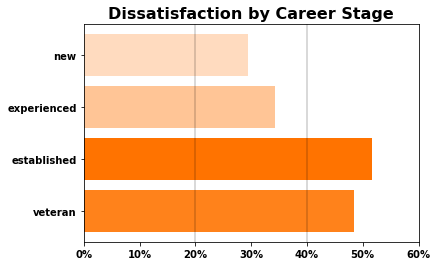

In [28]:
combined_pv = combined.pivot_table('dissatisfied', 'career_stage')
ordered_pv = combined_pv.loc[['new', 'experienced', 'established', 'veteran'],:].copy()
ordered_pv = ordered_pv.reset_index()

#This section controls the colors and alphas of the bar graph below
#The bars are shaded relative to their size, normalized on a scale from .25 to 1
#It's necessary for the rgba values to be stored as a list of tuples
#because plt.barh is bugged as of 3/25/22 and won't accept a list of strings like it's meant to 
#This bug has existed at three seperate points in 2017, 2019, and 2021, each with a different workaround
#The varied alpha does add a nice little detail to the graph
#But it was not worth the day and a half it took me to figure all this out
#And I just needed someone else to know my pain

rgbas = []                                        
for i in range(4):                                
    max_diss = ordered_pv['dissatisfied'].max()    
    min_diss = ordered_pv['dissatisfied'].min()   
    range_diss = max_diss - min_diss              
    rgbas.append((1, .45, 0, ((ordered_pv['dissatisfied'][i] - min_diss
                              )/range_diss) * 0.75 + 0.25))

plt.barh(ordered_pv['career_stage'], ordered_pv['dissatisfied'], color = rgbas)
plt.title('Dissatisfaction by Career Stage', weight = 'bold', size = 16, color = 'k')
plt.yticks(color ='k', weight = 'bold')
plt.xticks(ticks = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
          labels = ['0%', '10%', '20%', '30%', '40%', '50%', '60%'],
           color ='k', weight = 'bold')
plt.axvline(0.2, alpha = 0.2, color='k')
plt.axvline(0.4, alpha = 0.2, color='k')
plt.xlim(0, 0.6)
plt.gca().invert_yaxis()

The graph indicates that, of the resignations among the two agencies, a higher proportion of established and veteran employees are dissatisfied with their workplaces. However, because we are only looking at resignations, we don't know how many employees in these categories are remaining at their jobs. This data would be skewed if most established and veteran employees were satisfied with their jobs, and therefore not resigning and not filling out the exit survey. It could also be skewed by new or experienced employees opting to change jobs more frequently than their older colleagues.

Next we'll break the data up by institute to see if one is performing better in employee retention. We know from our earlier investigation of the data that the two organizations have comparable numbers of resignations, so it's reasonable to compare them. 

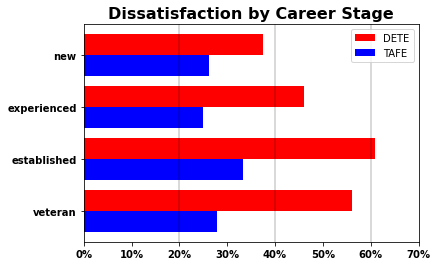

In [29]:
tafe_pv = combined[combined['institute'] == 'TAFE'].pivot_table('dissatisfied', 'career_stage')
tafe_opv = tafe_pv.loc[['new', 'experienced', 'established', 'veteran'],:].copy()
tafe_opv = tafe_opv.reset_index()

dete_pv = combined[combined['institute'] == 'DETE'].pivot_table('dissatisfied', 'career_stage')
dete_opv = dete_pv.loc[['new', 'experienced', 'established', 'veteran'],:].copy()
dete_opv = dete_opv.reset_index()

labels = ['new', 'experienced', 'established', 'veteran'] 
y = np.arange(len(labels))
width = 0.4
    
fig, ax = plt.subplots()
 
ax.barh(y - 0.2, dete_opv['dissatisfied'], width, label = 'DETE', color = 'r')
ax.barh(y + 0.2, tafe_opv['dissatisfied'], width, label = 'TAFE', color = 'b')
plt.title('Dissatisfaction by Career Stage', weight = 'bold', size = 16, color = 'k')
plt.yticks(ticks = y, labels = labels, color='k', weight = 'bold')
plt.xticks(ticks = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7],
          labels = ['0%', '10%', '20%', '30%', '40%', '50%', '60%', '70%'],
           color = 'k', weight = 'bold')
plt.axvline(0.2, alpha = 0.2, color='k')
plt.axvline(0.4, alpha = 0.2, color='k')
plt.axvline(0.6, alpha = 0.2, color='k')
plt.xlim(0, 0.7)
plt.legend()
plt.gca().invert_yaxis()

The data suggests that the Technical and Further Education Institute has much lower employee dissatisfaction than the Department of Education, Training, and Employment. It could be valuable to look at the difference in practices between the organizations to see what they are doing differently to yield these results. In a future section, we'll try to identify specific factors that correlate to dissatisfaction among employees.

## Conclusion & Future Analysis



This project had demonstrated my capabilities in Python in the following ways.

1. Open, read, and formatted .csv files into Pandas DataFrames
2. Increased the consistency of data types by converting to booleans and numerical scales
3. Sorted the data to extract relevant entries for analysis
4. Presented findings with clear and eye-catching graphs using Matplotlib

This analysis is currently being expanded. Statistical methods will be used to identify the survey answers that most closely correspond to resignations versus other types of employee turnover. Further comparisons will be made between the two agencies to determine if differences in practices is leading to the difference in turnover. Updates will be added as time permits.

Jacob Simon, March 2022